In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Embedding, Concatenate, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.utils import to_categorical, plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import MeanSquaredError
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
import numpy as np
import pandas as pd

In [3]:
file_path = r'C:\Users\CBS\Python_ML_2023\Exercises\Final Project\df_wine_clean.csv'
df = pd.read_csv(file_path)

In [4]:
df.columns

Index(['country', 'description', 'designation', 'points', 'price', 'province',
       'region_1', 'taster_name', 'title', 'variety', 'winery',
       'taster_weight_cat', 'clean_text', 'extracted_words',
       'extracted_digits'],
      dtype='object')

In [129]:
# Assuming df is your original DataFrame
sample_size = int(len(df) * 0.4)  # 100% of the data
sample_df = df.sample(n=sample_size, random_state=42)

In [130]:
len(sample_df)

51985

In [103]:
for column in sample_df.columns:
    unique_values_sum = sample_df[column].nunique()
    print(f"Sum of unique values in {column}: {unique_values_sum}")

Sum of unique values in country: 38
Sum of unique values in description: 25586
Sum of unique values in designation: 12123
Sum of unique values in points: 21
Sum of unique values in price: 349
Sum of unique values in province: 316
Sum of unique values in region_1: 934
Sum of unique values in taster_name: 20
Sum of unique values in title: 25515
Sum of unique values in variety: 473
Sum of unique values in winery: 9344
Sum of unique values in taster_weight_cat: 4
Sum of unique values in clean_text: 25585
Sum of unique values in extracted_words: 1153
Sum of unique values in extracted_digits: 57


In [9]:
### Text vectorization (tokenization)
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6


# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [9]:
# Find average number of tokens (words) in training Tweets
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

NameError: name 'train_sentences' is not defined

In [20]:
# Setup text vectorization with custom variables
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 40 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
###start here

In [11]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

In [12]:
# Define the column transformer
ct = ColumnTransformer([
    ('numeric', MinMaxScaler(), ['price']),
    ('categorical', OneHotEncoder(handle_unknown="ignore"), ['country',  'designation',  'province', 'region_1', 'taster_name',  'variety',      
                               'taster_weight_cat',  'extracted_words', 'extracted_digits'])
], remainder='passthrough')

In [135]:
# Create X & y
X = sample_df.drop(['points','clean_text','title','winery'], axis=1)
y = sample_df['points']

In [105]:
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [136]:
X_train.columns

Index(['country', 'description', 'designation', 'price', 'province',
       'region_1', 'taster_name', 'variety', 'taster_weight_cat',
       'extracted_words', 'extracted_digits'],
      dtype='object')

In [137]:
ct.fit_transform(X_train.drop('description', axis=1))

<31191x17267 sparse matrix of type '<class 'numpy.float64'>'
	with 311906 stored elements in Compressed Sparse Row format>

In [138]:
# Fit column transformer on the training data only (doing so on test data would result in data leakage)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train.drop('description', axis=1))
X_test_normal = ct.transform(X_test.drop('description', axis=1))

In [139]:
X_train_dense = X_train_normal.toarray()
X_test_dense=X_test_normal.toarray()

In [140]:
X_train_dense.shape

(31191, 17267)

In [141]:
X_test_dense.shape


(7798, 17267)

In [142]:
y_train.shape

(31191,)

In [113]:
X_train_dense[0]

array([0.00400641, 0.        , 0.        , ..., 0.        , 0.        ,
       0.        ])

In [143]:
text_vectorizer.adapt(X_train['description'])

In [144]:
### Text vectorization (tokenization)
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization # after TensorFlow 2.6


# Use the default TextVectorization variables
text_vectorizer = TextVectorization(max_tokens=None, # how many words in the vocabulary (all of the different words in your text)
                                    standardize="lower_and_strip_punctuation", # how to process text
                                    split="whitespace", # how to split tokens
                                    ngrams=None, # create groups of n-words?
                                    output_mode="int", # how to map tokens to numbers
                                    output_sequence_length=None) # how long should the output sequence of tokens be?
                                    # pad_to_max_tokens=True) # Not valid if using max_tokens=None

In [145]:
# Find average number of tokens (words) in training Tweets
average_words_per_description = round(sum([len(i.split()) for i in X_train['description']]) / len(X_train['description']))
average_words_per_description

40

In [146]:
# Setup text vectorization with custom variables
max_vocab_length = 11000 # max number of words to have in our vocabulary
max_length = 40 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)

text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [147]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(X_train['description'])

In [ ]:
# Creating an Embedding using an Embedding Layer

In [148]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding

In [149]:
tf.random.set_seed(42)
from tensorflow.keras import layers


#12948
num_input = layers.Input(shape=(17267,), dtype="float32")

text_input = layers.Input(shape=(1,), dtype="string")

# Apply text_vectorizer to text_input
#text_vectorizer = layers.TextVectorization(max_tokens=max_vocab_length, output_mode='int')
x = text_vectorizer(text_input)
x = embedding(x)
x = layers.LSTM(64)(x)

# Concatenate the outputs of all input layers
concatenated = layers.Concatenate()([num_input, x])

# Create the output layer
outputs = layers.Dense(1, activation="linear")(concatenated)

# Create the model
model_2 = tf.keras.Model([num_input, text_input], outputs, name="model_2_LSTM")

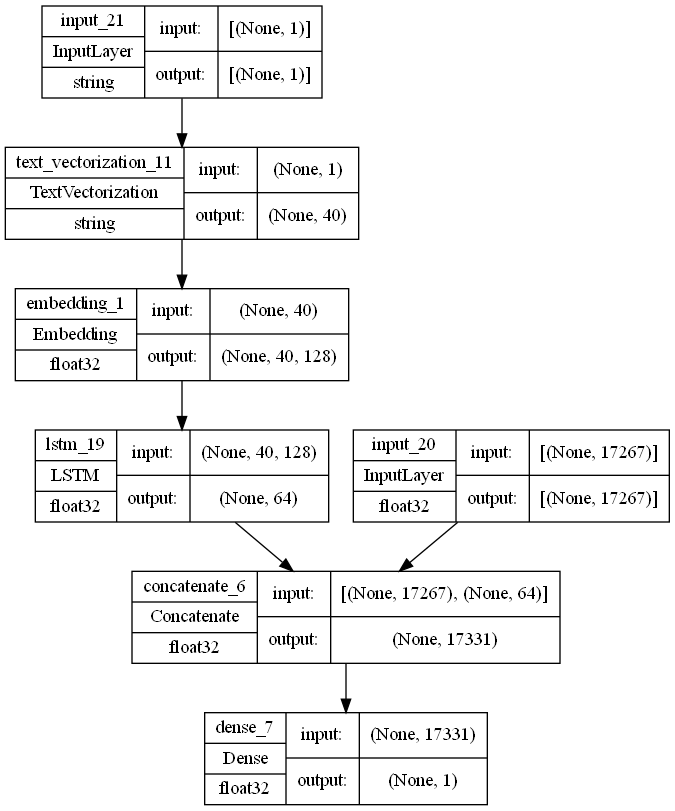

In [150]:
plot_model(model_2, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png') 

In [151]:
# Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse'])

In [152]:
X_train_dense.shape, np.array(X_train['description']).shape,y_train.shape

((31191, 17267), (31191,), (31191,))

In [153]:
model_2.fit([X_train_dense, np.array(X_train['description'])], y_train, epochs=15, batch_size=32)

Epoch 1/15
975/975 [==============================] - 30s 29ms/step - loss: 3410.4053 - mse: 3410.4053
Epoch 2/15
975/975 [==============================] - 29s 29ms/step - loss: 290.4756 - mse: 290.4756
Epoch 3/15
975/975 [==============================] - 29s 29ms/step - loss: 14.7274 - mse: 14.7274
Epoch 4/15
975/975 [==============================] - 29s 29ms/step - loss: 9.5197 - mse: 9.5197
Epoch 5/15
975/975 [==============================] - 29s 29ms/step - loss: 8.9548 - mse: 8.9548
Epoch 6/15
975/975 [==============================] - 29s 29ms/step - loss: 8.3162 - mse: 8.3162
Epoch 7/15
975/975 [==============================] - 29s 30ms/step - loss: 7.6849 - mse: 7.6849
Epoch 8/15
975/975 [==============================] - 29s 30ms/step - loss: 7.1403 - mse: 7.1403
Epoch 9/15
975/975 [==============================] - 30s 30ms/step - loss: 6.7194 - mse: 6.7194
Epoch 10/15
975/975 [==============================] - 29s 30ms/step - loss: 6.4051 - mse: 6.4051
Epoch 11/15
975/9

In [154]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict([X_test_dense, np.array(X_test['description'])])

244/244 [==============================] - 2s 6ms/step


In [155]:
model_2_pred_probs[:10]

array([[85.914604],
       [89.0753  ],
       [84.38629 ],
       [85.50472 ],
       [88.913925],
       [88.09779 ],
       [93.47756 ],
       [87.26065 ],
       [89.20038 ],
       [84.78057 ]], dtype=float32)

In [156]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_2_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([86., 89., 84., 86., 89., 88., 93., 87., 89., 85., 90., 81., 92.,
       86., 92., 83., 90., 91., 92., 85.], dtype=float32)>

In [157]:
# Get  results
calculate_results(y_true= y_test,
                                     y_pred=model_1_preds)

{'MAE': 1.3330341113105924,
 'MSE': 3.1422159528084124,
 'R-squared': 0.6664200899698816}

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def calculate_results(y_true, y_pred):
    """
    Calculates model MAE, MSE, and R-squared of a regression model.

    Args:
    -----
    y_true: true labels in the form of a 1D array
    y_pred: predicted labels in the form of a 1D array

    Returns a dictionary of MAE, MSE, and R-squared.
    """
    # Calculate MAE
    model_mae = mean_absolute_error(y_true, y_pred)
    # Calculate MSE
    model_mse = mean_squared_error(y_true, y_pred)
    # Calculate R-squared
    model_r2 = r2_score(y_true, y_pred)

    model_results = {"MAE": model_mae,
                     "MSE": model_mse,
                     "R-squared": model_r2}

    return model_results

In [ ]:
# improve the model

In [158]:
# Fit the text vectorization layer with the training data
text_vectorizer.adapt(np.array(X_train['description']))

In [163]:
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Input layers
num_input = layers.Input(shape=(17267,), dtype="float32")
text_input = layers.Input(shape=(1,), dtype="string")


x = text_vectorizer(text_input)
embedding = layers.Embedding(input_dim=max_vocab_length, output_dim=100)(x)
x = layers.Dropout(0.5)(embedding)
x = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x)
x = layers.Dropout(0.5)(x)
x = layers.Bidirectional(layers.LSTM(64))(x)

# Concatenate the outputs of all input layers
concatenated = layers.Concatenate()([num_input, x])

# Dense layers
x = layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.01))(concatenated)
outputs = layers.Dense(1, activation="linear")(x)




In [164]:
# Create the model
model_2 = tf.keras.Model([num_input, text_input], outputs, name="improved_model")


In [165]:
# Compile the model
model_2.compile(loss="mean_squared_error", optimizer="adam")


In [166]:
# Fit the model
model_2.fit([X_train_dense, np.array(X_train['description'])], y_train, epochs=10, batch_size=32)

Epoch 1/10
975/975 [==============================] - 87s 82ms/step - loss: 301.6542
Epoch 2/10
975/975 [==============================] - 82s 84ms/step - loss: 8.0055
Epoch 3/10
975/975 [==============================] - 82s 84ms/step - loss: 7.6888
Epoch 4/10
975/975 [==============================] - 83s 85ms/step - loss: 7.1932
Epoch 5/10
975/975 [==============================] - 83s 85ms/step - loss: 5.4114
Epoch 6/10
975/975 [==============================] - 83s 86ms/step - loss: 3.7310
Epoch 7/10
975/975 [==============================] - 83s 86ms/step - loss: 3.2189
Epoch 8/10
975/975 [==============================] - 84s 86ms/step - loss: 2.9202
Epoch 9/10
975/975 [==============================] - 84s 86ms/step - loss: 2.6706
Epoch 10/10
975/975 [==============================] - 84s 86ms/step - loss: 2.4985


In [167]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict([X_test_dense, np.array(X_test['description'])])

244/244 [==============================] - 5s 19ms/step


In [168]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_2_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([88., 89., 86., 85., 88., 89., 93., 87., 88., 86., 90., 83., 92.,
       85., 93., 85., 90., 90., 92., 86.], dtype=float32)>

In [169]:
# Get  results
calculate_results(y_true= y_test,
                                     y_pred=model_1_preds)

{'MAE': 1.361246473454732,
 'MSE': 3.1965888689407542,
 'R-squared': 0.6606478220087024}

# model 2 adding another text layer

In [13]:
# Assuming df is your original DataFrame
sample_size = int(len(df) * 0.4)  # 100% of the data
sample_df = df.sample(n=sample_size, random_state=42)

In [14]:
# Create X & y
X = sample_df.drop(['points','clean_text','title'], axis=1)
y = sample_df['points']

In [15]:
# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
ct.fit_transform(X_train.drop(['description','winery'], axis=1))

<41588x20761 sparse matrix of type '<class 'numpy.float64'>'
	with 415874 stored elements in Compressed Sparse Row format>

In [17]:
# Transform the training and test data using the fitted column transformer
X_train_normal = ct.transform(X_train.drop(['description', 'winery'], axis=1))
X_test_normal = ct.transform(X_test.drop(['description', 'winery'], axis=1))

In [18]:
X_train_dense = X_train_normal.toarray()
X_test_dense=X_test_normal.toarray()

In [19]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding2 = layers.Embedding(input_dim=max_vocab_length, # set input shape
                             output_dim=128, # set size of embedding vector
                             embeddings_initializer="uniform", # default, intialize randomly
                             input_length=max_length, # how long is each input
                             name="embedding_1") 

embedding2

In [21]:
# Define the text vectorization layer
text_vectorizer1 = layers.TextVectorization(max_tokens=max_vocab_length, output_mode='int', output_sequence_length=max_length, name='text_vectorizer')


In [22]:
# Define the text vectorization layer
text_vectorizer2 = layers.TextVectorization(max_tokens=max_vocab_length, output_mode='int', output_sequence_length=max_length, name='text_vectorizer')


In [23]:
# Fit the text vectorizer to the training text
text_vectorizer1.adapt(X_train['description'])

In [24]:
# Fit the text vectorizer to the training text
text_vectorizer2.adapt(X_train['winery'])

In [29]:
import tensorflow as tf
from tensorflow.keras import layers

tf.random.set_seed(42)

max_vocab_length = 10000
max_length = 100

# Define the text vectorization layers with unique names
text_vectorizer1 = layers.TextVectorization(max_tokens=max_vocab_length, output_mode='int', output_sequence_length=max_length, name='text_vectorizer1')
text_vectorizer2 = layers.TextVectorization(max_tokens=max_vocab_length, output_mode='int', output_sequence_length=max_length, name='text_vectorizer2')

# Fit the text vectorizers to the training text
text_vectorizer1.adapt(X_train['description'])
text_vectorizer2.adapt(X_train['winery'])

# Define the embedding layer
embedding2 = layers.Embedding(input_dim=max_vocab_length, output_dim=128, embeddings_initializer="uniform", input_length=max_length, name="embedding")

# Define the input layers
num_input = layers.Input(shape=(20761,), dtype="float32")
text_input_1 = layers.Input(shape=(1,), dtype="string")
text_input_2 = layers.Input(shape=(1,), dtype="string")

# Apply text_vectorizer1 to text_input_1
x1 = text_vectorizer1(text_input_1)
x1 = embedding2(x1)
x1 = layers.Dropout(0.5)(x1)
x1 = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x1)
x1 = layers.Dropout(0.5)(x1)
x1 = layers.Bidirectional(layers.LSTM(64))(x1)

# Apply text_vectorizer2 to text_input_2
x2 = text_vectorizer2(text_input_2)
x2 = embedding2(x2)
x2 = layers.Dropout(0.5)(x2)
x2 = layers.Bidirectional(layers.LSTM(128, return_sequences=True))(x2)
x2 = layers.Dropout(0.5)(x2)
x2 = layers.Bidirectional(layers.LSTM(64))(x2)

# Concatenate the outputs of all input layers
concatenated = layers.Concatenate()([num_input, x1, x2])

# Create the output layer
outputs = layers.Dense(1, activation="linear")(concatenated)

# Create the model
model_2 = tf.keras.Model([num_input, text_input_1, text_input_2], outputs, name="model_2_LSTM")


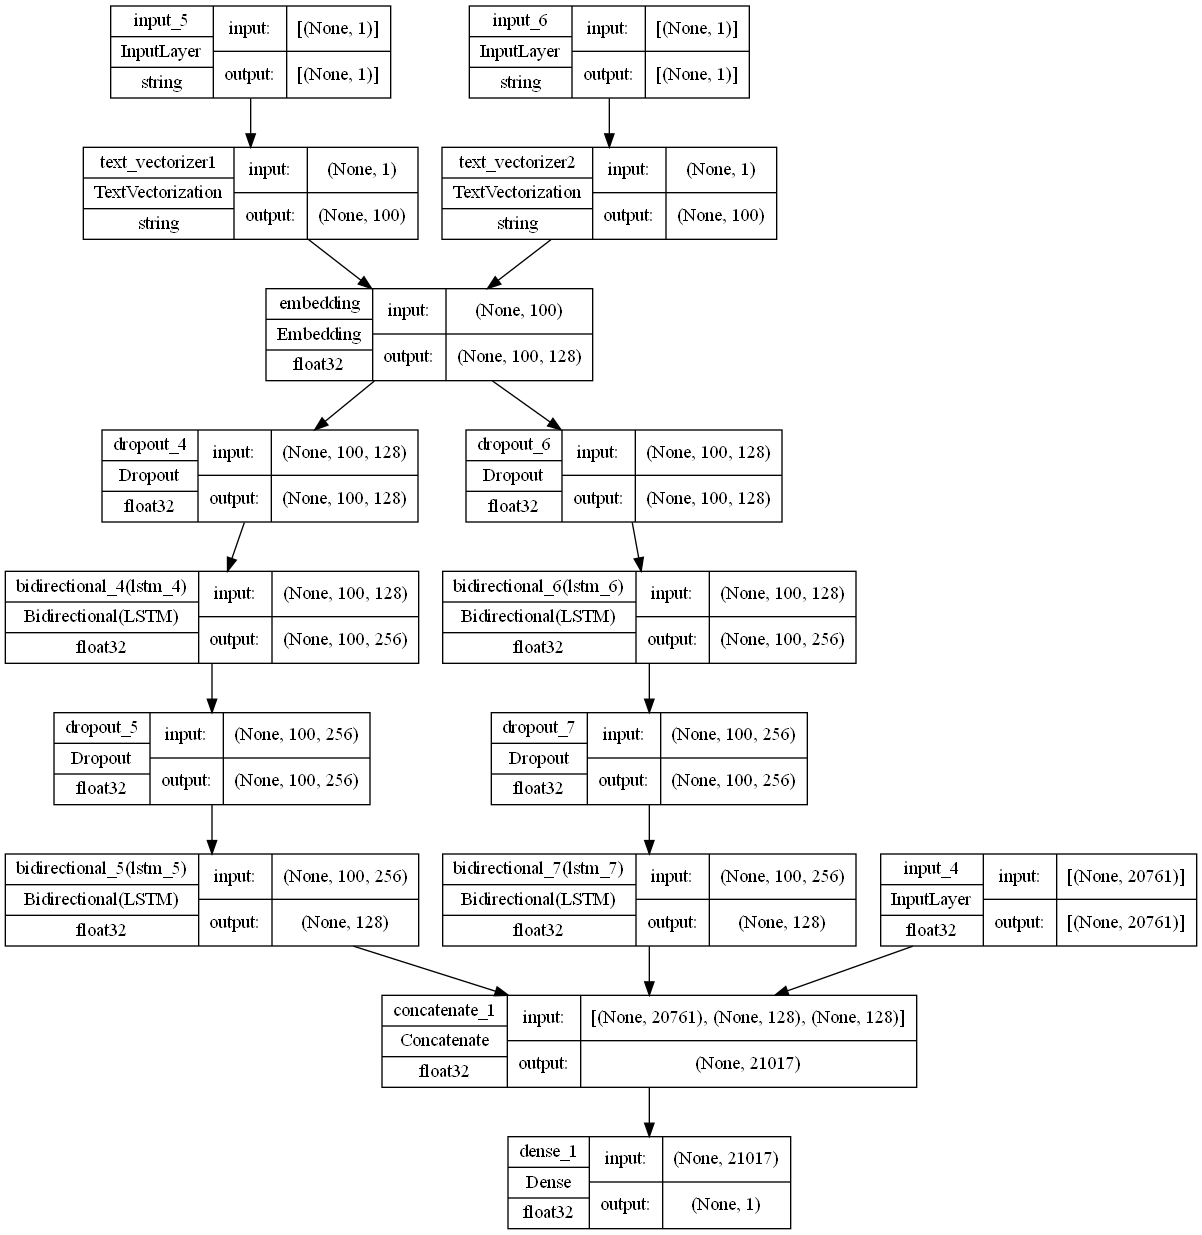

In [30]:
plot_model(model_2, show_dtype=True, show_shapes=True, show_layer_names=True, to_file='model_1.png') 

In [31]:
# Compile the model
model_2.compile(loss=tf.keras.losses.mse,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=['mse'])

In [32]:
# Fit the model
model_2.fit([X_train_dense, np.array(X_train['description']),np.array(X_train['winery'])], y_train, epochs=20, batch_size=32)

Epoch 1/20
1300/1300 [==============================] - 469s 354ms/step - loss: 721.0235 - mse: 721.0235
Epoch 2/20
1300/1300 [==============================] - 473s 364ms/step - loss: 8.8465 - mse: 8.8465
Epoch 3/20
1300/1300 [==============================] - 479s 368ms/step - loss: 8.1707 - mse: 8.1707
Epoch 4/20
1300/1300 [==============================] - 481s 370ms/step - loss: 7.4496 - mse: 7.4496
Epoch 5/20
1300/1300 [==============================] - 487s 375ms/step - loss: 3.4221 - mse: 3.4221
Epoch 6/20
1300/1300 [==============================] - 490s 377ms/step - loss: 2.0721 - mse: 2.0721
Epoch 7/20
1300/1300 [==============================] - 490s 377ms/step - loss: 2.1264 - mse: 2.1264
Epoch 8/20
1300/1300 [==============================] - 491s 378ms/step - loss: 1.5314 - mse: 1.5314
Epoch 9/20
1300/1300 [==============================] - 492s 378ms/step - loss: 1.3781 - mse: 1.3781
Epoch 10/20
1300/1300 [==============================] - 494s 380ms/step - loss: 1.2393

In [33]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict([X_test_dense, np.array(X_test['description']),np.array(X_test['winery'])])

325/325 [==============================] - 42s 122ms/step


In [34]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_2_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([88., 83., 91., 88., 86., 87., 92., 86., 92., 92., 87., 89., 89.,
       89., 84., 91., 87., 89., 88., 86.], dtype=float32)>

In [37]:
# Get  results
calculate_results(y_true= y_test,
                                     y_pred=model_1_preds)


{'MAE': 1.1689910551120515,
 'MSE': 2.4660959892276617,
 'R-squared': 0.7321339565226489}

In [90]:
# Fit the model
model_2.fit([X_train_dense, np.array(X_train['description']),np.array(X_train['winery'])], y_train, epochs=20, batch_size=32)

Epoch 1/20
650/650 [==============================] - 210s 310ms/step - loss: 1423.3765 - mse: 1423.3765
Epoch 2/20
650/650 [==============================] - 212s 327ms/step - loss: 9.4089 - mse: 9.4089
Epoch 3/20
650/650 [==============================] - 215s 330ms/step - loss: 8.9410 - mse: 8.9410
Epoch 4/20
650/650 [==============================] - 216s 332ms/step - loss: 8.6309 - mse: 8.6309
Epoch 5/20
650/650 [==============================] - 216s 333ms/step - loss: 8.2703 - mse: 8.2703
Epoch 6/20
650/650 [==============================] - 218s 335ms/step - loss: 7.8958 - mse: 7.8958
Epoch 7/20
650/650 [==============================] - 218s 335ms/step - loss: 7.5260 - mse: 7.5260
Epoch 8/20
650/650 [==============================] - 219s 337ms/step - loss: 5.9641 - mse: 5.9641
Epoch 9/20
650/650 [==============================] - 219s 337ms/step - loss: 5.0476 - mse: 5.0476
Epoch 10/20
650/650 [==============================] - 219s 337ms/step - loss: 4.6127 - mse: 4.6127
Epo

In [91]:
# Make predictions on the validation dataset
model_2_pred_probs = model_2.predict([X_test_dense, np.array(X_test['description']),np.array(X_test['winery'])])

163/163 [==============================] - 15s 78ms/step


In [92]:
# Turn prediction probabilities into single-dimension tensor of floats
model_1_preds = tf.squeeze(tf.round(model_2_pred_probs)) # squeeze removes single dimensions
model_1_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([88., 87., 85., 88., 87., 94., 88., 92., 86., 85., 88., 88., 83.,
       88., 87., 91., 93., 91., 91., 87.], dtype=float32)>

In [93]:
# Get  results
calculate_results(y_true= y_test,
                                     y_pred=model_1_preds)


{'MAE': 1.3058280438545875,
 'MSE': 2.955376033852664,
 'R-squared': 0.6853692896321124}